We are going to use rdkit to clean a dataframe that contain non-allowed molecules.

First of all, we will "play" with rdkit in order to learn how to manage molecules

In [1]:
# PART 1 .- MOLECULES SANITIZATION

We first have to verify if our input molecules in SMILES format are correct. This step is sometimes called "sanitization". 

For instance, we can check if the SMILES 'C(Cl)CCC=O' represents a correct molecule. We will convert to mol object and re-convert to smiles. This two steps (From Smiles to Mol and from Mol to Smiles) have different arguments that can be useful depending on our interests (http://rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html) 

In [2]:
from rdkit import Chem

# declare our molecules in SMILES format
smi = 'C(Cl)CCC=O'

# instantiate "mol" object
mol = Chem.MolFromSmiles(smi)

# re-obtain the SMILES
smi_sanitized = Chem.MolToSmiles(mol)

print('SMILES {} is correct and has been sanitized to {}'.format(smi, smi_sanitized))

SMILES C(Cl)CCC=O is correct and has been sanitized to O=CCCCCl


If the mol object can not be instantiated, we will not be able to return any sanitized smiles. If you run the next cell, it will raise an error. 

In [3]:
# declare our molecules in SMILES format
smi2 = 'CClCCC=OF'

# instantiate "mol" object
mol2 = Chem.MolFromSmiles(smi2)

smi2_sanitized = Chem.MolToSmiles(mol2)

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(class RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)

We can add a try/except expression in order to bypass the error and return "None" instead

In [4]:
# declare our molecules in SMILES format
smi2 = 'CClCCC=OF'


# instantiate "mol" object
mol2 = Chem.MolFromSmiles(smi2)
try:
    sanitized_smi2 = Chem.MolToSmiles(Chem.MolFromSmiles(smi2))
except:
    sanitized_smi2 = None
print(sanitized_smi2)

None


## TASK 1 PART 1 .- Use rdkit to exclude incorrect molecules from a dataframe

Imagine that you have a pandas dataframe like the following

In [23]:
import pandas as pd

d = {'SMILES': ['COO','CClCCC=OF', 'c1ccc([Se](=O)O)cc1', 'CCCC'], 'y': [1.3, 2.4,3.22, 3.64]}

df = pd.DataFrame(data=d)

print(df)

                SMILES     y
0                  COO  1.30
1            CClCCC=OF  2.40
2  c1ccc([Se](=O)O)cc1  3.22
3                 CCCC  3.64


Iterate through elements in SMILES columns and create a list called incorrect_indx that will contain those indx with incorrect SMILES. 

In [ ]:
# WRITE YOUR CODE HERE


After that, use this list to drop these indexes from the dataframe. Donnot forget to reset your index. You resulting dataframe should be:

In [ ]:
#                SMILES     y
#0                  COO  1.30
#1  c1ccc([Se](=O)O)cc1  3.22
#2                 CCCC  3.64

# PART 2 .- OBTAINING INFORMATION ABOUT OUR ATOMS AND BONDS

From the mol object we can obtain a lot of information. We can visualize the molecule:

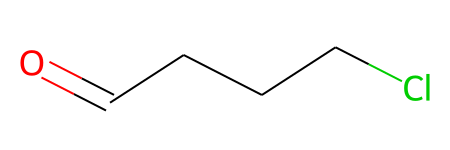

In [6]:
from rdkit import Chem

# declare our molecules in SMILES format
smi = 'C(Cl)CCC=O'

# instantiate "mol" object
mol = Chem.MolFromSmiles(smi)

# and we can visualize our molecule
mol

Sometimes, numbering the atom/bonds of our molecule can be useful:

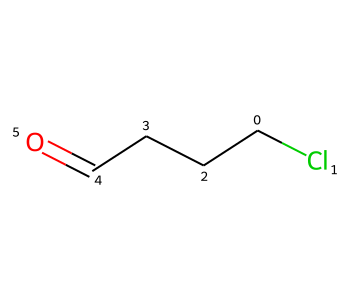

In [7]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
from IPython.display import SVG

# We draw our molecule with numbered atoms:
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(mol)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

We can identify every atom of our molecule, by iteration

In [ ]:
for idx_atom, atom in enumerate(mol.GetAtoms()):
    print('atom {}: {}'.format(idx_atom, atom.GetSymbol()))

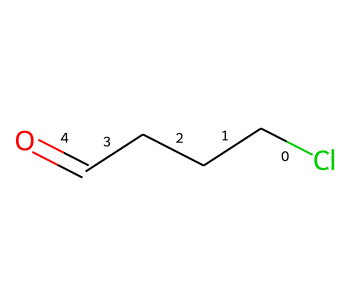

In [8]:
# Or we can number bonds:
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addBondIndices=True
d2d.DrawMolecule(mol)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

And identify the bond type

In [ ]:
for idx_bond, bond in enumerate(mol.GetBonds()):
    print('bond {}: {}'.format(idx_bond, bond.GetBondType()))

All that can be useful to filter non-allowed molecules. For instance, we will only allow molecules that contain 'C' and 'O'. Note that will stop when it finds the first "non-allowed" atom.

In [9]:
allowed_atoms = ['C','O']

correct = True
for idx_atom, atom in enumerate(mol.GetAtoms()):
    if atom.GetSymbol() not in allowed_atoms:
        correct = False
        print('Molecule with {} not allowed'.format(atom.GetSymbol()))
        break

if correct == True:
    print('Your molecule is OK')

Molecule with Cl not allowed


## PART 2 TASK 1 .- Use rdkit to enumerate atoms and bonds

In the code below, enumerate and identify all the atoms and bonds of molecule "CCOC(=O)CC(SP(=S)(OC)OC)C(=O)OCC"

In [ ]:
# WRITE YOUR CODE HERE

## PART 2 TASK 2 .- Eliminate molecules that contain invalid atoms

As before, imagine that you have a pandas dataframe with different molecules:

In [24]:
d2 = {'SMILES': ['COO','c1ccc([Se](=O)O)cc1', 'CCCC'], 'y': [1.3, 3.22, 3.64]}

df2 = pd.DataFrame(data=d2)

print(df2)

                SMILES     y
0                  COO  1.30
1  c1ccc([Se](=O)O)cc1  3.22
2                 CCCC  3.64


Iterate through elements in SMILES columns and create a list called non_allowed_indx that will contain those indx with SMILES that contain non allowed atoms. We will allow H, N, C, O, P, S, Si, P, F, Cl, Br and I.

In [25]:
# WRITE YOUR CODE HERE

After that, use this list to drop these indexes from the dataframe. Donnot forget to reset your index. You resulting dataframe should be:

In [ ]:
#                SMILES     y
#0                  COO  1.30
#1                 CCCC  3.64

# FINAL SCRIPT

Download the dataframe from https://github.com/evaserranocandelas/course called "pers_sed-preprocessed.csv". Create an script to eliminate incorrect SMILES and molecules with non-allowed atoms. We will only allow: H, N, C, O, P, S, Si, P, F, Cl, Br and I.

In [ ]:
# WRITE YOUR CODE HERE